In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import os
import globals as gl
from force import load_mov
from matplotlib import colormaps as cm
from util import lowpass_butter, lowpass_fir
from matplotlib.lines import Line2D
from vis import plot_behav

import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')

Base directory found: /cifs/diedrichsen/data/Chord_exp
Atlas directory found: /cifs/diedrichsen/data/Atlas_templates/fs_LR_32


In [2]:
until_day = 24
days = np.arange(1, until_day + 1, 1)

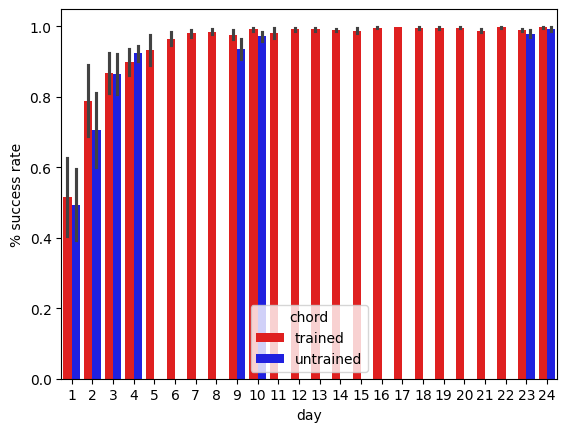

In [3]:
dat = pd.DataFrame()
sns = [101, 102, 103, 104, 105, 106,]
experiment = 'EFC_learningfMRI'

for sn in sns:
    for day in days:
        path = os.path.join(gl.baseDir, experiment, 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
        dat_tmp = pd.read_csv(path, sep='\t')
        dat = pd.concat([dat, dat_tmp], ignore_index=True)

dat = dat.groupby(['subNum', 'session', 'day', 'chord']).mean(numeric_only=True).reset_index()
sb.barplot(x='day', y='trialPoint', hue='chord', data=dat, errorbar='se', palette=['red', 'blue'],hue_order=['trained', 'untrained'])

plt.ylabel('% success rate')
plt.show()

trained vs. untrained, day1: tval=1.245, pval=0.268
trained vs. untrained, day2: tval=-0.284, pval=0.788
trained vs. untrained, day3: tval=-0.412, pval=0.698
trained vs. untrained, day4: tval=0.102, pval=0.924
trained vs. untrained, day9: tval=-3.988, pval=0.010
trained vs. untrained, day10: tval=-2.868, pval=0.035
trained vs. untrained, day23: tval=-2.306, pval=0.069
trained vs. untrained, day24: tval=-1.393, pval=0.222


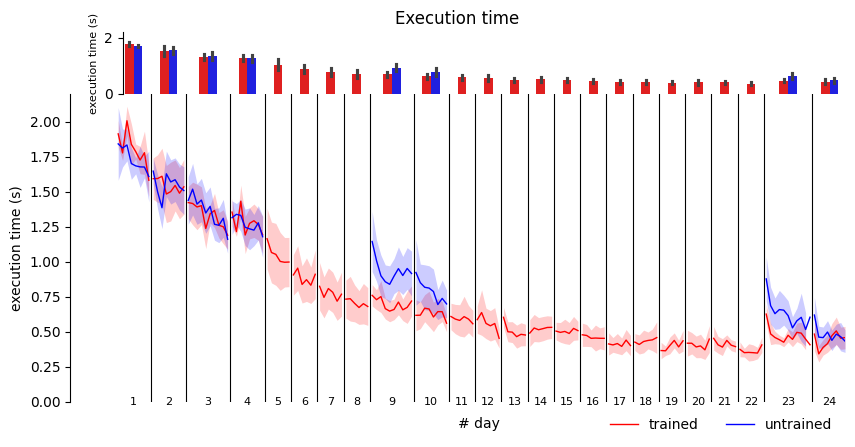

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_behav(fig, ax, days, sns, metric='ET', ylim=[0, 2.2], ylabel='execution time (s)', title='Execution time')
plt.show()

trained vs. untrained, day1: tval=0.332, pval=0.754
trained vs. untrained, day2: tval=-1.601, pval=0.170
trained vs. untrained, day3: tval=-0.210, pval=0.842
trained vs. untrained, day4: tval=0.272, pval=0.799
trained vs. untrained, day9: tval=-2.925, pval=0.033
trained vs. untrained, day10: tval=-2.504, pval=0.054
trained vs. untrained, day23: tval=-2.553, pval=0.051
trained vs. untrained, day24: tval=-3.067, pval=0.028


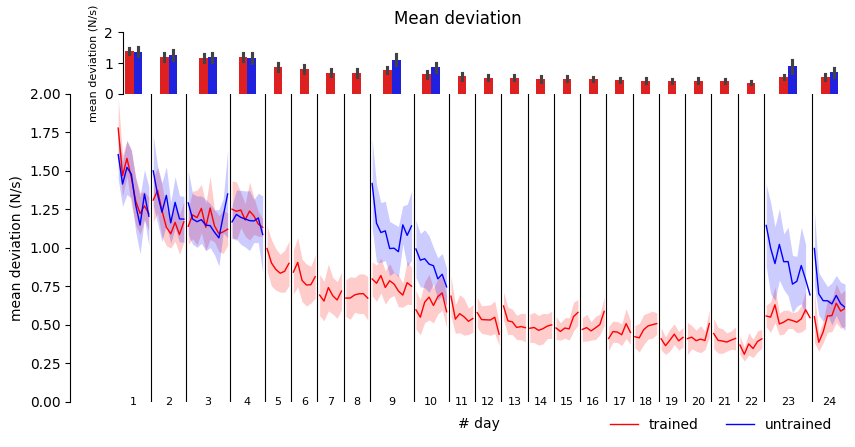

In [5]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_behav(fig, ax, days, sns, metric='MD', ylim=[0, 2], ylabel='mean deviation (N/s)', title='Mean deviation',)
plt.show()

trained vs. untrained, day1: tval=0.476, pval=0.654
trained vs. untrained, day2: tval=1.413, pval=0.217
trained vs. untrained, day3: tval=-0.214, pval=0.839
trained vs. untrained, day4: tval=0.864, pval=0.436
trained vs. untrained, day9: tval=1.964, pval=0.107
trained vs. untrained, day10: tval=1.359, pval=0.232
trained vs. untrained, day23: tval=0.420, pval=0.692
trained vs. untrained, day24: tval=4.071, pval=0.010


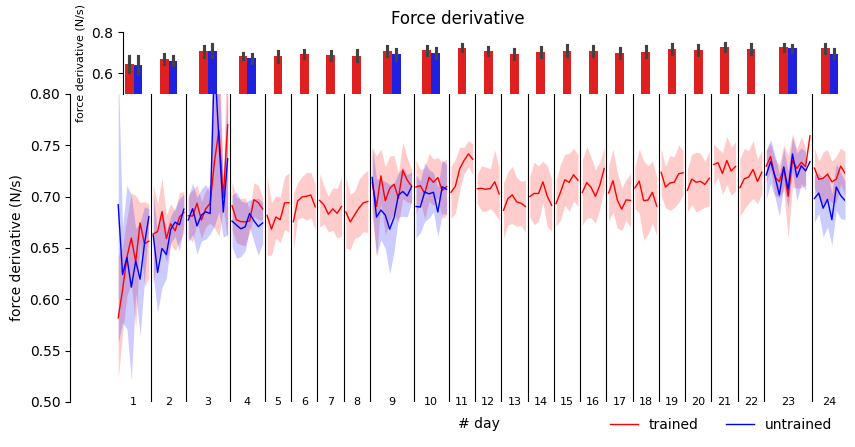

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_behav(fig, ax, days, sns, metric='force_der', ylim=[.5, .8], melt=True, id_vars=['subNum', 'chordID', 'chord', 'TN', 'BN', 'day'],value_vars=['thumb_der', 'index_der', 'middle_der', 'ring_der', 'pinkie_der'], var_name='finger', ylabel='force derivative (N/s)', title='Force derivative', )
plt.show()

trained vs. untrained, day1: tval=0.221, pval=0.834
trained vs. untrained, day2: tval=-0.322, pval=0.761
trained vs. untrained, day3: tval=1.549, pval=0.182
trained vs. untrained, day4: tval=0.449, pval=0.677
trained vs. untrained, day9: tval=2.519, pval=0.053
trained vs. untrained, day10: tval=3.255, pval=0.023
trained vs. untrained, day23: tval=0.942, pval=0.389
trained vs. untrained, day24: tval=6.423, pval=0.001


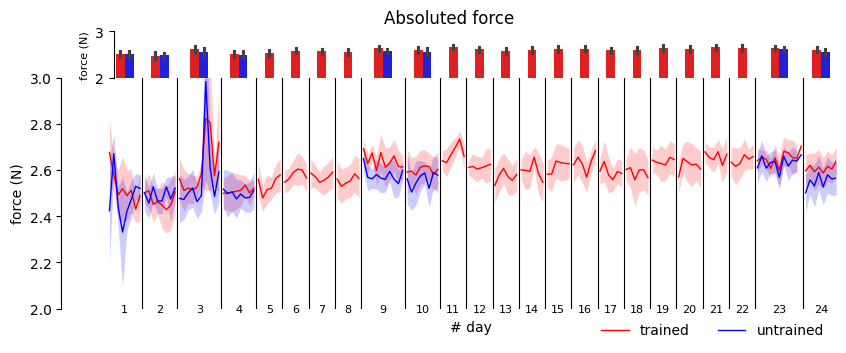

In [7]:
fig, ax = plt.subplots(figsize=(10, 3))
plot_behav(fig, ax, days, sns, metric='force', ylim=[2, 3], melt=True, id_vars=['subNum', 'chordID', 'chord', 'TN', 'BN', 'day'],value_vars=['thumb_abs', 'index_abs', 'middle_abs', 'ring_abs', 'pinkie_abs'], var_name='finger', ylabel='force (N)', title='Absoluted force', )
plt.show()

In [8]:
# check amount of force